# WGAN-GP Training

## imports

In [1]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
# config.gpu_options.per_process_gpu_memory_fraction = 0.4
config.gpu_options.allow_growth=True
set_session(tf.Session(config=config))

Using TensorFlow backend.


In [2]:
%matplotlib inline

import os
import matplotlib.pyplot as plt

from models.WGANGP import WGANGP
from utils.loaders import load_celeb

import pickle


In [3]:
# run params
SECTION = 'gan'
RUN_ID = '0003'
DATA_NAME = 'celeb'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

## data

In [4]:
BATCH_SIZE = 64
IMAGE_SIZE = 64

In [5]:
x_train = load_celeb(DATA_NAME, IMAGE_SIZE, BATCH_SIZE)

Found 202599 images belonging to 1 classes.


In [6]:
x_train[0][0][0]

array([[[ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        ...,
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ]],

       [[ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        ...,
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ]],

       [[ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        ...,
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ]],

       ...,

       [[ 0.9607843 ,  0.9529412 ,  0.99215686],
        [ 0

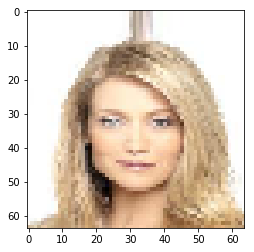

In [7]:
plt.imshow((x_train[0][0][0]+1)/2)

## architecture

In [8]:
gan = WGANGP(input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
        , critic_conv_filters = [64,128,256,512]
        , critic_conv_kernel_size = [5,5,5,5]
        , critic_conv_strides = [2,2,2,2]
        , critic_batch_norm_momentum = None
        , critic_activation = 'leaky_relu'
        , critic_dropout_rate = None
        , critic_learning_rate = 0.0002
        , generator_initial_dense_layer_size = (4, 4, 512)
        , generator_upsample = [1,1,1,1]
        , generator_conv_filters = [256,128,64,3]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [2,2,2,2]
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'leaky_relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0002
        , optimiser = 'adam'
        , grad_weight = 10
        , z_dim = 100
        , batch_size = BATCH_SIZE
        )

if mode == 'build':
    gan.save(RUN_FOLDER)

else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))




W0608 10:18:41.457719 140252946859776 deprecation.py:506] From /home/comadan/.venv/gdl/lib/python3.6/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
gan.critic.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    (None, 64, 64, 3)         0         
_________________________________________________________________
critic_conv_0 (Conv2D)       (None, 32, 32, 64)        4864      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
critic_conv_1 (Conv2D)       (None, 16, 16, 128)       204928    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 128)       0         
_________________________________________________________________
critic_conv_2 (Conv2D)       (None, 8, 8, 256)         819456    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 8, 8, 256)         0   

In [10]:
gan.generator.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 8192)              827392    
_________________________________________________________________
batch_normalization_1 (Batch (None, 8192)              32768     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 8192)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 512)         0         
_________________________________________________________________
generator_conv_0 (Conv2DTran (None, 8, 8, 256)         3277056   
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 256)         1024

## training

In [11]:
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 5
N_CRITIC = 5
BATCH_SIZE = 64

In [12]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , n_critic = N_CRITIC
    , using_generator = True
)

/home/comadan/.venv/gdl/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
W0608 10:18:45.338371 140252946859776 deprecation.py:323] From /home/comadan/.venv/gdl/lib/python3.6/site-packages/tensorflow_core/python/ops/math_grad.py:1424: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0608 10:18:46.368149 140252946859776 module_wrapper.py:139] From /home/comadan/.venv/gdl/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

/home/comadan/.venv/gdl/lib/python3.6/site-packages/keras/engine/training.py:297: UserWar

0 (5, 1) [D loss: (1.9)(R -3.7, F -0.4, G 0.6)] [G loss: 0.9]


/home/comadan/.venv/gdl/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 (5, 1) [D loss: (-57.5)(R -84.1, F 3.9, G 2.3)] [G loss: -5.7]
2 (5, 1) [D loss: (-102.6)(R -199.4, F 22.6, G 7.4)] [G loss: -13.5]
3 (5, 1) [D loss: (-129.6)(R -232.7, F 20.1, G 8.3)] [G loss: -18.1]
4 (5, 1) [D loss: (-127.0)(R -191.3, F 10.3, G 5.4)] [G loss: -18.3]
5 (5, 1) [D loss: (-125.5)(R -222.0, F 12.9, G 8.4)] [G loss: 1.0]
6 (5, 1) [D loss: (-128.9)(R -217.8, F 11.8, G 7.7)] [G loss: -11.4]
7 (5, 1) [D loss: (-116.2)(R -204.0, F 9.7, G 7.8)] [G loss: -0.9]
8 (5, 1) [D loss: (-127.7)(R -220.1, F 23.7, G 6.9)] [G loss: -26.2]
9 (5, 1) [D loss: (-113.4)(R -171.7, F 11.6, G 4.7)] [G loss: -25.6]
10 (5, 1) [D loss: (-119.5)(R -217.4, F 29.5, G 6.8)] [G loss: -26.4]
11 (5, 1) [D loss: (-104.7)(R -192.7, F 20.3, G 6.8)] [G loss: 4.4]
12 (5, 1) [D loss: (-106.1)(R -171.9, F 10.7, G 5.5)] [G loss: -27.0]
13 (5, 1) [D loss: (-109.5)(R -179.2, F 8.2, G 6.1)] [G loss: -12.4]
14 (5, 1) [D loss: (-102.5)(R -221.8, F 28.3, G 9.1)] [G loss: -2.9]
15 (5, 1) [D loss: (-109.0)(R -180.2, F 1

121 (5, 1) [D loss: (-22.8)(R -73.6, F 45.7, G 0.5)] [G loss: -42.1]
122 (5, 1) [D loss: (-20.1)(R -63.4, F 39.4, G 0.4)] [G loss: -41.7]
123 (5, 1) [D loss: (-17.4)(R -93.6, F 70.4, G 0.6)] [G loss: -60.3]
124 (5, 1) [D loss: (-22.3)(R -70.7, F 43.7, G 0.5)] [G loss: -49.4]
125 (5, 1) [D loss: (-20.0)(R -78.5, F 53.0, G 0.6)] [G loss: -52.8]
126 (5, 1) [D loss: (-18.9)(R -70.7, F 47.9, G 0.4)] [G loss: -44.5]
127 (5, 1) [D loss: (-18.3)(R -72.3, F 50.0, G 0.4)] [G loss: -49.7]
128 (5, 1) [D loss: (-19.4)(R -45.1, F 22.1, G 0.4)] [G loss: -26.5]
129 (5, 1) [D loss: (-17.4)(R -48.9, F 26.5, G 0.5)] [G loss: -29.6]
130 (5, 1) [D loss: (-19.8)(R -56.5, F 33.1, G 0.4)] [G loss: -32.1]
131 (5, 1) [D loss: (-19.2)(R -63.4, F 40.2, G 0.4)] [G loss: -47.8]
132 (5, 1) [D loss: (-18.3)(R -58.8, F 36.1, G 0.4)] [G loss: -47.1]
133 (5, 1) [D loss: (-16.2)(R -51.9, F 32.2, G 0.4)] [G loss: -36.9]
134 (5, 1) [D loss: (-17.7)(R -62.8, F 41.5, G 0.4)] [G loss: -38.7]
135 (5, 1) [D loss: (-17.7)(R -68.

239 (5, 1) [D loss: (-12.9)(R -117.5, F 101.7, G 0.3)] [G loss: -108.6]
240 (5, 1) [D loss: (-14.3)(R -135.6, F 119.0, G 0.2)] [G loss: -128.1]
241 (5, 1) [D loss: (-12.0)(R -130.7, F 116.8, G 0.2)] [G loss: -113.0]
242 (5, 1) [D loss: (-14.5)(R -131.3, F 114.8, G 0.2)] [G loss: -112.3]
243 (5, 1) [D loss: (-11.2)(R -137.6, F 124.2, G 0.2)] [G loss: -117.9]
244 (5, 1) [D loss: (-14.6)(R -143.1, F 125.5, G 0.3)] [G loss: -127.4]
245 (5, 1) [D loss: (-12.2)(R -114.5, F 100.7, G 0.2)] [G loss: -106.0]
246 (5, 1) [D loss: (-11.0)(R -131.8, F 117.8, G 0.3)] [G loss: -115.6]
247 (5, 1) [D loss: (-11.3)(R -133.8, F 120.2, G 0.2)] [G loss: -109.5]
248 (5, 1) [D loss: (-14.1)(R -125.5, F 109.6, G 0.2)] [G loss: -117.1]
249 (5, 1) [D loss: (-11.0)(R -145.9, F 133.0, G 0.2)] [G loss: -126.2]
250 (5, 1) [D loss: (-12.3)(R -145.8, F 130.8, G 0.3)] [G loss: -128.0]
251 (5, 1) [D loss: (-13.6)(R -141.2, F 125.7, G 0.2)] [G loss: -133.5]
252 (5, 1) [D loss: (-11.5)(R -142.6, F 129.0, G 0.2)] [G loss: 

355 (5, 1) [D loss: (-10.3)(R -84.6, F 72.1, G 0.2)] [G loss: -71.2]
356 (5, 1) [D loss: (-12.0)(R -79.8, F 66.0, G 0.2)] [G loss: -67.6]
357 (5, 1) [D loss: (-12.7)(R -92.4, F 77.8, G 0.2)] [G loss: -78.9]
358 (5, 1) [D loss: (-11.0)(R -87.1, F 73.8, G 0.2)] [G loss: -70.2]
359 (5, 1) [D loss: (-9.0)(R -87.8, F 76.7, G 0.2)] [G loss: -65.0]
360 (5, 1) [D loss: (-12.2)(R -91.3, F 76.8, G 0.2)] [G loss: -74.2]
361 (5, 1) [D loss: (-11.1)(R -96.1, F 83.0, G 0.2)] [G loss: -77.3]
362 (5, 1) [D loss: (-13.8)(R -106.9, F 90.1, G 0.3)] [G loss: -87.9]
363 (5, 1) [D loss: (-11.2)(R -89.2, F 76.0, G 0.2)] [G loss: -76.4]
364 (5, 1) [D loss: (-8.4)(R -78.8, F 68.1, G 0.2)] [G loss: -60.8]
365 (5, 1) [D loss: (-12.4)(R -84.8, F 70.6, G 0.2)] [G loss: -69.9]
366 (5, 1) [D loss: (-12.5)(R -90.2, F 74.9, G 0.3)] [G loss: -68.5]
367 (5, 1) [D loss: (-10.6)(R -81.4, F 68.6, G 0.2)] [G loss: -61.5]
368 (5, 1) [D loss: (-14.0)(R -91.6, F 75.5, G 0.2)] [G loss: -73.6]
369 (5, 1) [D loss: (-11.9)(R -77.3

474 (5, 1) [D loss: (-11.2)(R -45.2, F 32.2, G 0.2)] [G loss: -33.1]
475 (5, 1) [D loss: (-13.8)(R -58.1, F 42.4, G 0.2)] [G loss: -46.6]
476 (5, 1) [D loss: (-11.5)(R -63.9, F 50.1, G 0.2)] [G loss: -47.5]
477 (5, 1) [D loss: (-11.0)(R -51.2, F 38.1, G 0.2)] [G loss: -41.4]
478 (5, 1) [D loss: (-11.5)(R -58.1, F 44.1, G 0.3)] [G loss: -45.5]
479 (5, 1) [D loss: (-12.3)(R -60.5, F 46.1, G 0.2)] [G loss: -41.9]
480 (5, 1) [D loss: (-10.8)(R -50.5, F 37.9, G 0.2)] [G loss: -38.9]
481 (5, 1) [D loss: (-10.1)(R -58.3, F 46.5, G 0.2)] [G loss: -44.7]
482 (5, 1) [D loss: (-12.6)(R -61.6, F 46.6, G 0.2)] [G loss: -43.7]
483 (5, 1) [D loss: (-14.1)(R -81.5, F 63.4, G 0.4)] [G loss: -66.6]
484 (5, 1) [D loss: (-9.2)(R -63.5, F 52.2, G 0.2)] [G loss: -48.9]
485 (5, 1) [D loss: (-11.1)(R -63.3, F 50.3, G 0.2)] [G loss: -48.6]
486 (5, 1) [D loss: (-11.9)(R -53.4, F 38.4, G 0.3)] [G loss: -34.2]
487 (5, 1) [D loss: (-11.6)(R -44.3, F 30.8, G 0.2)] [G loss: -29.7]
488 (5, 1) [D loss: (-12.0)(R -49.4

593 (5, 1) [D loss: (-12.2)(R -35.7, F 21.3, G 0.2)] [G loss: -24.9]
594 (5, 1) [D loss: (-9.7)(R -40.4, F 29.0, G 0.2)] [G loss: -22.6]
595 (5, 1) [D loss: (-11.4)(R -36.2, F 22.5, G 0.2)] [G loss: -22.2]
596 (5, 1) [D loss: (-12.1)(R -42.5, F 28.6, G 0.2)] [G loss: -30.9]
597 (5, 1) [D loss: (-10.2)(R -34.4, F 22.2, G 0.2)] [G loss: -23.1]
598 (5, 1) [D loss: (-11.9)(R -37.4, F 23.4, G 0.2)] [G loss: -23.2]
599 (5, 1) [D loss: (-10.5)(R -21.9, F 9.4, G 0.2)] [G loss: -12.9]
600 (5, 1) [D loss: (-11.4)(R -32.8, F 19.4, G 0.2)] [G loss: -14.4]
601 (5, 1) [D loss: (-10.7)(R -33.6, F 21.1, G 0.2)] [G loss: -18.6]
602 (5, 1) [D loss: (-12.6)(R -43.3, F 28.3, G 0.2)] [G loss: -33.4]
603 (5, 1) [D loss: (-12.4)(R -39.8, F 25.2, G 0.2)] [G loss: -24.6]
604 (5, 1) [D loss: (-11.1)(R -32.1, F 19.1, G 0.2)] [G loss: -16.7]
605 (5, 1) [D loss: (-11.3)(R -36.4, F 23.6, G 0.2)] [G loss: -21.6]
606 (5, 1) [D loss: (-10.5)(R -29.6, F 17.4, G 0.2)] [G loss: -16.3]
607 (5, 1) [D loss: (-10.7)(R -26.6,

713 (5, 1) [D loss: (-10.1)(R -19.0, F 7.0, G 0.2)] [G loss: -5.4]
714 (5, 1) [D loss: (-10.0)(R -24.0, F 11.9, G 0.2)] [G loss: -15.7]
715 (5, 1) [D loss: (-10.9)(R -25.1, F 12.1, G 0.2)] [G loss: -15.0]
716 (5, 1) [D loss: (-10.3)(R -22.3, F 9.5, G 0.2)] [G loss: -7.1]
717 (5, 1) [D loss: (-11.6)(R -21.8, F 7.2, G 0.3)] [G loss: -13.7]
718 (5, 1) [D loss: (-13.0)(R -32.5, F 17.2, G 0.2)] [G loss: -18.6]
719 (5, 1) [D loss: (-10.6)(R -25.5, F 13.3, G 0.2)] [G loss: -14.1]
720 (5, 1) [D loss: (-10.8)(R -19.1, F 6.1, G 0.2)] [G loss: -4.6]
721 (5, 1) [D loss: (-11.0)(R -20.3, F 7.8, G 0.1)] [G loss: -7.4]
722 (5, 1) [D loss: (-12.1)(R -24.6, F 10.1, G 0.2)] [G loss: -4.7]
723 (5, 1) [D loss: (-11.6)(R -33.1, F 19.6, G 0.2)] [G loss: -19.2]
724 (5, 1) [D loss: (-11.2)(R -31.2, F 17.8, G 0.2)] [G loss: -14.0]
725 (5, 1) [D loss: (-10.9)(R -22.3, F 9.5, G 0.2)] [G loss: -11.5]
726 (5, 1) [D loss: (-11.4)(R -30.9, F 16.9, G 0.3)] [G loss: -12.4]
727 (5, 1) [D loss: (-11.0)(R -28.9, F 15.5, 

834 (5, 1) [D loss: (-11.6)(R -26.2, F 12.6, G 0.2)] [G loss: -18.2]
835 (5, 1) [D loss: (-11.4)(R -22.8, F 9.1, G 0.2)] [G loss: -9.7]
836 (5, 1) [D loss: (-11.6)(R -21.7, F 8.2, G 0.2)] [G loss: -10.2]
837 (5, 1) [D loss: (-10.9)(R -23.9, F 10.9, G 0.2)] [G loss: -6.6]
838 (5, 1) [D loss: (-12.0)(R -17.6, F 3.4, G 0.2)] [G loss: -3.8]
839 (5, 1) [D loss: (-10.2)(R -11.8, F -0.3, G 0.2)] [G loss: -1.0]
840 (5, 1) [D loss: (-11.0)(R -28.7, F 15.6, G 0.2)] [G loss: -15.2]
841 (5, 1) [D loss: (-10.5)(R -19.5, F 6.3, G 0.3)] [G loss: -5.4]
842 (5, 1) [D loss: (-11.4)(R -21.8, F 9.0, G 0.1)] [G loss: -5.8]
843 (5, 1) [D loss: (-11.7)(R -22.8, F 9.3, G 0.2)] [G loss: -9.5]
844 (5, 1) [D loss: (-11.2)(R -19.4, F 6.2, G 0.2)] [G loss: -4.1]
845 (5, 1) [D loss: (-12.1)(R -25.7, F 11.2, G 0.2)] [G loss: -11.8]
846 (5, 1) [D loss: (-11.1)(R -13.9, F 0.8, G 0.2)] [G loss: 2.9]
847 (5, 1) [D loss: (-10.2)(R -24.0, F 11.3, G 0.2)] [G loss: -11.0]
848 (5, 1) [D loss: (-11.6)(R -24.1, F 10.3, G 0.2)]

956 (5, 1) [D loss: (-11.9)(R -13.3, F -0.8, G 0.2)] [G loss: 0.6]
957 (5, 1) [D loss: (-11.6)(R -22.0, F 8.5, G 0.2)] [G loss: -9.9]
958 (5, 1) [D loss: (-10.7)(R -14.3, F 1.7, G 0.2)] [G loss: -5.4]
959 (5, 1) [D loss: (-11.0)(R -17.2, F 4.3, G 0.2)] [G loss: -3.5]
960 (5, 1) [D loss: (-10.9)(R -15.4, F 2.4, G 0.2)] [G loss: -5.5]
961 (5, 1) [D loss: (-11.7)(R -14.7, F 0.9, G 0.2)] [G loss: 0.3]
962 (5, 1) [D loss: (-9.4)(R -17.0, F 5.0, G 0.3)] [G loss: -4.3]
963 (5, 1) [D loss: (-11.0)(R -21.9, F 8.7, G 0.2)] [G loss: -10.7]
964 (5, 1) [D loss: (-10.9)(R -23.1, F 9.9, G 0.2)] [G loss: -2.0]
965 (5, 1) [D loss: (-11.2)(R -10.1, F -3.1, G 0.2)] [G loss: 3.9]
966 (5, 1) [D loss: (-11.5)(R -9.8, F -3.6, G 0.2)] [G loss: 0.2]
967 (5, 1) [D loss: (-11.0)(R -10.9, F -2.0, G 0.2)] [G loss: 8.4]
968 (5, 1) [D loss: (-14.6)(R -32.7, F 15.1, G 0.3)] [G loss: -17.7]
969 (5, 1) [D loss: (-9.2)(R -15.2, F 3.6, G 0.2)] [G loss: -5.3]
970 (5, 1) [D loss: (-10.7)(R -7.9, F -5.4, G 0.3)] [G loss: 4.

1077 (5, 1) [D loss: (-10.6)(R -13.8, F 0.4, G 0.3)] [G loss: 0.3]
1078 (5, 1) [D loss: (-10.5)(R -12.4, F 0.2, G 0.2)] [G loss: 0.0]
1079 (5, 1) [D loss: (-11.2)(R -23.3, F 9.9, G 0.2)] [G loss: -6.7]
1080 (5, 1) [D loss: (-11.5)(R -18.3, F 5.1, G 0.2)] [G loss: -3.4]
1081 (5, 1) [D loss: (-10.6)(R -26.7, F 13.2, G 0.3)] [G loss: -5.4]
1082 (5, 1) [D loss: (-10.7)(R -18.9, F 6.1, G 0.2)] [G loss: -7.5]
1083 (5, 1) [D loss: (-10.4)(R -12.3, F 0.2, G 0.2)] [G loss: 5.7]
1084 (5, 1) [D loss: (-10.9)(R -10.8, F -2.1, G 0.2)] [G loss: 3.9]
1085 (5, 1) [D loss: (-11.3)(R -22.9, F 9.5, G 0.2)] [G loss: -4.0]
1086 (5, 1) [D loss: (-12.9)(R -24.0, F 9.3, G 0.2)] [G loss: -10.6]
1087 (5, 1) [D loss: (-10.4)(R -19.0, F 7.2, G 0.1)] [G loss: -7.3]
1088 (5, 1) [D loss: (-10.1)(R -10.5, F -1.2, G 0.2)] [G loss: 5.2]
1089 (5, 1) [D loss: (-11.4)(R -10.5, F -2.5, G 0.2)] [G loss: 1.8]
1090 (5, 1) [D loss: (-11.1)(R -21.3, F 8.5, G 0.2)] [G loss: -6.7]
1091 (5, 1) [D loss: (-11.9)(R -12.9, F -0.8, G 0

1198 (5, 1) [D loss: (-10.8)(R -14.1, F 1.2, G 0.2)] [G loss: -1.4]
1199 (5, 1) [D loss: (-9.8)(R -16.5, F 4.8, G 0.2)] [G loss: -2.8]
1200 (5, 1) [D loss: (-10.9)(R -13.3, F 0.8, G 0.2)] [G loss: -1.4]
1201 (5, 1) [D loss: (-10.7)(R -10.2, F -2.8, G 0.2)] [G loss: 3.9]
1202 (5, 1) [D loss: (-10.1)(R -11.9, F -0.2, G 0.2)] [G loss: 0.2]
1203 (5, 1) [D loss: (-9.2)(R -9.9, F -1.5, G 0.2)] [G loss: 1.8]
1204 (5, 1) [D loss: (-9.1)(R -12.9, F 1.6, G 0.2)] [G loss: 2.2]
1205 (5, 1) [D loss: (-10.6)(R -18.0, F 5.5, G 0.2)] [G loss: -5.8]
1206 (5, 1) [D loss: (-10.0)(R -9.4, F -2.4, G 0.2)] [G loss: 1.2]
1207 (5, 1) [D loss: (-10.0)(R -14.8, F 3.1, G 0.2)] [G loss: -3.0]
1208 (5, 1) [D loss: (-10.9)(R -13.9, F 1.2, G 0.2)] [G loss: -2.5]
1209 (5, 1) [D loss: (-10.3)(R -15.6, F 3.4, G 0.2)] [G loss: 1.0]
1210 (5, 1) [D loss: (-11.1)(R -10.8, F -2.0, G 0.2)] [G loss: -2.2]
1211 (5, 1) [D loss: (-9.5)(R -16.7, F 5.1, G 0.2)] [G loss: -1.9]
1212 (5, 1) [D loss: (-10.7)(R -3.6, F -8.3, G 0.1)] [G

1320 (5, 1) [D loss: (-10.2)(R -24.3, F 11.9, G 0.2)] [G loss: -8.3]
1321 (5, 1) [D loss: (-9.4)(R -9.5, F -1.4, G 0.2)] [G loss: 2.8]
1322 (5, 1) [D loss: (-10.4)(R -18.6, F 6.1, G 0.2)] [G loss: -0.9]
1323 (5, 1) [D loss: (-9.2)(R -16.0, F 4.8, G 0.2)] [G loss: -1.7]
1324 (5, 1) [D loss: (-9.8)(R -24.7, F 12.8, G 0.2)] [G loss: -8.5]
1325 (5, 1) [D loss: (-10.1)(R -15.9, F 3.3, G 0.2)] [G loss: -0.0]
1326 (5, 1) [D loss: (-11.8)(R -3.7, F -9.8, G 0.2)] [G loss: 9.6]
1327 (5, 1) [D loss: (-10.7)(R -6.1, F -6.5, G 0.2)] [G loss: 6.1]
1328 (5, 1) [D loss: (-11.5)(R -21.5, F 7.5, G 0.3)] [G loss: -8.4]
1329 (5, 1) [D loss: (-11.0)(R -6.1, F -6.6, G 0.2)] [G loss: 11.2]
1330 (5, 1) [D loss: (-10.3)(R -10.0, F -1.9, G 0.2)] [G loss: 2.1]
1331 (5, 1) [D loss: (-13.1)(R -12.1, F -3.3, G 0.2)] [G loss: 1.0]
1332 (5, 1) [D loss: (-8.5)(R -17.1, F 6.5, G 0.2)] [G loss: -7.4]
1333 (5, 1) [D loss: (-10.1)(R -20.1, F 8.0, G 0.2)] [G loss: -7.7]
1334 (5, 1) [D loss: (-10.8)(R -24.1, F 11.0, G 0.2)]

1442 (5, 1) [D loss: (-11.4)(R -9.7, F -3.2, G 0.2)] [G loss: 3.6]
1443 (5, 1) [D loss: (-10.1)(R -9.8, F -2.2, G 0.2)] [G loss: -0.4]
1444 (5, 1) [D loss: (-9.6)(R -12.0, F 0.4, G 0.2)] [G loss: 3.9]
1445 (5, 1) [D loss: (-10.5)(R -11.4, F -0.7, G 0.2)] [G loss: 0.3]
1446 (5, 1) [D loss: (-10.2)(R -16.8, F 4.5, G 0.2)] [G loss: 0.4]
1447 (5, 1) [D loss: (-9.7)(R -5.7, F -5.5, G 0.2)] [G loss: 8.4]
1448 (5, 1) [D loss: (-9.9)(R -8.3, F -3.3, G 0.2)] [G loss: 7.4]
1449 (5, 1) [D loss: (-11.5)(R -23.3, F 9.8, G 0.2)] [G loss: -8.1]
1450 (5, 1) [D loss: (-10.7)(R -12.5, F -0.1, G 0.2)] [G loss: -1.5]
1451 (5, 1) [D loss: (-9.1)(R -11.2, F 0.7, G 0.1)] [G loss: 4.3]
1452 (5, 1) [D loss: (-10.0)(R -17.6, F 5.5, G 0.2)] [G loss: -4.3]
1453 (5, 1) [D loss: (-12.0)(R -14.3, F 0.6, G 0.2)] [G loss: -0.6]
1454 (5, 1) [D loss: (-10.0)(R -0.9, F -10.7, G 0.2)] [G loss: 7.4]
1455 (5, 1) [D loss: (-10.3)(R -9.3, F -2.3, G 0.1)] [G loss: 1.7]
1456 (5, 1) [D loss: (-10.2)(R -4.6, F -7.6, G 0.2)] [G lo

1564 (5, 1) [D loss: (-9.3)(R -9.9, F -1.3, G 0.2)] [G loss: 4.3]
1565 (5, 1) [D loss: (-10.9)(R -10.8, F -2.5, G 0.2)] [G loss: 4.7]
1566 (5, 1) [D loss: (-8.6)(R -7.7, F -2.3, G 0.1)] [G loss: 2.7]
1567 (5, 1) [D loss: (-10.3)(R -14.4, F 1.7, G 0.2)] [G loss: -3.7]
1568 (5, 1) [D loss: (-11.2)(R -7.0, F -6.0, G 0.2)] [G loss: 6.1]
1569 (5, 1) [D loss: (-11.0)(R -7.8, F -5.2, G 0.2)] [G loss: 2.9]
1570 (5, 1) [D loss: (-8.4)(R -11.1, F 1.1, G 0.2)] [G loss: 2.0]
1571 (5, 1) [D loss: (-10.0)(R -7.6, F -4.5, G 0.2)] [G loss: 3.7]
1572 (5, 1) [D loss: (-11.1)(R -7.9, F -5.2, G 0.2)] [G loss: 5.6]
1573 (5, 1) [D loss: (-9.2)(R -1.4, F -10.0, G 0.2)] [G loss: 10.1]
1574 (5, 1) [D loss: (-9.4)(R -6.1, F -4.9, G 0.2)] [G loss: 0.4]
1575 (5, 1) [D loss: (-10.0)(R -13.1, F 0.9, G 0.2)] [G loss: 3.8]
1576 (5, 1) [D loss: (-10.4)(R -8.9, F -3.5, G 0.2)] [G loss: 0.4]
1577 (5, 1) [D loss: (-9.6)(R -10.3, F -1.9, G 0.3)] [G loss: 0.9]
1578 (5, 1) [D loss: (-9.9)(R -3.1, F -8.7, G 0.2)] [G loss: 10

1687 (5, 1) [D loss: (-9.8)(R -9.5, F -1.9, G 0.2)] [G loss: 2.2]
1688 (5, 1) [D loss: (-10.3)(R -5.3, F -6.7, G 0.2)] [G loss: 10.3]
1689 (5, 1) [D loss: (-10.5)(R -12.3, F -0.2, G 0.2)] [G loss: 4.0]
1690 (5, 1) [D loss: (-9.9)(R -12.1, F 0.8, G 0.1)] [G loss: -1.0]
1691 (5, 1) [D loss: (-10.1)(R -13.5, F 1.7, G 0.2)] [G loss: -1.5]
1692 (5, 1) [D loss: (-9.8)(R -3.6, F -8.2, G 0.2)] [G loss: 7.6]
1693 (5, 1) [D loss: (-10.7)(R -6.5, F -6.2, G 0.2)] [G loss: 4.8]
1694 (5, 1) [D loss: (-10.4)(R 5.3, F -18.0, G 0.2)] [G loss: 16.2]
1695 (5, 1) [D loss: (-8.8)(R -6.9, F -3.8, G 0.2)] [G loss: 2.0]
1696 (5, 1) [D loss: (-10.8)(R -10.0, F -2.8, G 0.2)] [G loss: 4.5]
1697 (5, 1) [D loss: (-11.2)(R -11.6, F -1.3, G 0.2)] [G loss: 2.7]
1698 (5, 1) [D loss: (-9.4)(R 0.1, F -11.2, G 0.2)] [G loss: 11.8]
1699 (5, 1) [D loss: (-10.6)(R -12.3, F 0.2, G 0.1)] [G loss: 1.8]
1700 (5, 1) [D loss: (-10.1)(R -9.2, F -3.1, G 0.2)] [G loss: 1.5]
1701 (5, 1) [D loss: (-10.5)(R -5.3, F -6.9, G 0.2)] [G los

1810 (5, 1) [D loss: (-9.3)(R -5.9, F -5.0, G 0.2)] [G loss: 5.5]
1811 (5, 1) [D loss: (-8.8)(R -5.1, F -5.0, G 0.1)] [G loss: 6.5]
1812 (5, 1) [D loss: (-10.2)(R -8.8, F -2.7, G 0.1)] [G loss: 0.4]
1813 (5, 1) [D loss: (-9.0)(R -8.6, F -2.2, G 0.2)] [G loss: 3.0]
1814 (5, 1) [D loss: (-10.0)(R -7.4, F -4.2, G 0.2)] [G loss: 3.4]
1815 (5, 1) [D loss: (-10.1)(R -18.4, F 6.1, G 0.2)] [G loss: -1.2]
1816 (5, 1) [D loss: (-11.3)(R -6.6, F -6.2, G 0.2)] [G loss: -1.7]
1817 (5, 1) [D loss: (-10.0)(R -12.8, F 1.5, G 0.1)] [G loss: -2.4]
1818 (5, 1) [D loss: (-9.8)(R -6.3, F -5.3, G 0.2)] [G loss: 4.0]
1819 (5, 1) [D loss: (-9.8)(R -3.9, F -8.0, G 0.2)] [G loss: 2.8]
1820 (5, 1) [D loss: (-10.7)(R -9.1, F -3.5, G 0.2)] [G loss: 4.2]
1821 (5, 1) [D loss: (-9.6)(R -4.0, F -7.3, G 0.2)] [G loss: 9.6]
1822 (5, 1) [D loss: (-10.6)(R -3.8, F -8.6, G 0.2)] [G loss: 8.4]
1823 (5, 1) [D loss: (-9.2)(R -1.6, F -9.1, G 0.1)] [G loss: 8.2]
1824 (5, 1) [D loss: (-10.1)(R -9.5, F -2.4, G 0.2)] [G loss: 0.7]

1933 (5, 1) [D loss: (-7.9)(R -12.9, F 2.9, G 0.2)] [G loss: 0.7]
1934 (5, 1) [D loss: (-9.4)(R -4.3, F -6.6, G 0.2)] [G loss: 6.9]
1935 (5, 1) [D loss: (-9.9)(R -6.0, F -5.5, G 0.2)] [G loss: 2.7]
1936 (5, 1) [D loss: (-8.9)(R -0.7, F -10.2, G 0.2)] [G loss: 9.0]
1937 (5, 1) [D loss: (-9.3)(R -10.0, F -0.8, G 0.1)] [G loss: 4.6]
1938 (5, 1) [D loss: (-8.1)(R -6.8, F -2.8, G 0.1)] [G loss: 3.9]
1939 (5, 1) [D loss: (-8.9)(R -15.5, F 5.2, G 0.1)] [G loss: -2.4]
1940 (5, 1) [D loss: (-9.6)(R -8.4, F -2.5, G 0.1)] [G loss: 7.7]
1941 (5, 1) [D loss: (-10.6)(R -3.8, F -8.2, G 0.1)] [G loss: 6.7]
1942 (5, 1) [D loss: (-9.6)(R -2.0, F -8.8, G 0.1)] [G loss: 6.0]
1943 (5, 1) [D loss: (-9.7)(R -11.6, F 0.6, G 0.1)] [G loss: -0.6]
1944 (5, 1) [D loss: (-9.8)(R -7.5, F -3.9, G 0.2)] [G loss: 4.7]
1945 (5, 1) [D loss: (-10.5)(R -8.5, F -3.7, G 0.2)] [G loss: 4.3]
1946 (5, 1) [D loss: (-7.2)(R -8.9, F 0.0, G 0.2)] [G loss: 0.5]
1947 (5, 1) [D loss: (-9.7)(R -8.4, F -2.9, G 0.2)] [G loss: 7.1]
1948 

2056 (5, 1) [D loss: (-9.2)(R -5.3, F -5.4, G 0.1)] [G loss: 2.8]
2057 (5, 1) [D loss: (-8.8)(R -5.4, F -5.1, G 0.2)] [G loss: 5.1]
2058 (5, 1) [D loss: (-9.0)(R 1.0, F -11.7, G 0.2)] [G loss: 10.5]
2059 (5, 1) [D loss: (-8.9)(R -4.6, F -5.7, G 0.1)] [G loss: 7.5]
2060 (5, 1) [D loss: (-11.5)(R -15.4, F 2.1, G 0.2)] [G loss: -1.7]
2061 (5, 1) [D loss: (-9.5)(R -8.6, F -2.0, G 0.1)] [G loss: 4.8]
2062 (5, 1) [D loss: (-8.4)(R -2.6, F -7.2, G 0.1)] [G loss: 6.6]
2063 (5, 1) [D loss: (-8.9)(R 3.5, F -13.9, G 0.1)] [G loss: 12.1]
2064 (5, 1) [D loss: (-9.2)(R -2.7, F -7.6, G 0.1)] [G loss: 9.3]
2065 (5, 1) [D loss: (-9.8)(R -11.0, F -0.3, G 0.1)] [G loss: 1.8]
2066 (5, 1) [D loss: (-9.2)(R -12.9, F 1.9, G 0.2)] [G loss: -1.2]
2067 (5, 1) [D loss: (-10.0)(R -7.2, F -4.4, G 0.2)] [G loss: 4.0]
2068 (5, 1) [D loss: (-9.5)(R -2.8, F -8.0, G 0.1)] [G loss: 9.2]
2069 (5, 1) [D loss: (-8.5)(R 4.5, F -14.3, G 0.1)] [G loss: 11.4]
2070 (5, 1) [D loss: (-9.2)(R -7.2, F -3.7, G 0.2)] [G loss: 7.0]
20

2180 (5, 1) [D loss: (-10.2)(R -2.6, F -9.0, G 0.1)] [G loss: 10.6]
2181 (5, 1) [D loss: (-7.8)(R -2.4, F -6.7, G 0.1)] [G loss: 2.1]
2182 (5, 1) [D loss: (-7.8)(R -6.2, F -3.4, G 0.2)] [G loss: 3.5]
2183 (5, 1) [D loss: (-9.6)(R 0.8, F -12.0, G 0.2)] [G loss: 14.9]
2184 (5, 1) [D loss: (-9.5)(R -1.8, F -9.6, G 0.2)] [G loss: 7.8]
2185 (5, 1) [D loss: (-8.4)(R -1.8, F -8.2, G 0.2)] [G loss: 9.3]
2186 (5, 1) [D loss: (-8.5)(R -7.2, F -3.0, G 0.2)] [G loss: 0.5]
2187 (5, 1) [D loss: (-9.5)(R -11.0, F -0.9, G 0.2)] [G loss: -0.7]
2188 (5, 1) [D loss: (-8.1)(R -6.1, F -2.9, G 0.1)] [G loss: 4.2]
2189 (5, 1) [D loss: (-10.1)(R -2.3, F -9.3, G 0.1)] [G loss: 11.3]
2190 (5, 1) [D loss: (-9.0)(R 0.0, F -10.9, G 0.2)] [G loss: 12.2]
2191 (5, 1) [D loss: (-8.4)(R -4.0, F -6.3, G 0.2)] [G loss: 1.6]
2192 (5, 1) [D loss: (-8.7)(R -9.6, F -0.9, G 0.2)] [G loss: -1.0]
2193 (5, 1) [D loss: (-8.9)(R -12.3, F 1.9, G 0.1)] [G loss: -0.3]
2194 (5, 1) [D loss: (-8.9)(R -10.1, F -0.3, G 0.2)] [G loss: 0.3]

2304 (5, 1) [D loss: (-7.8)(R -7.3, F -1.7, G 0.1)] [G loss: 0.8]
2305 (5, 1) [D loss: (-8.7)(R -13.3, F 2.4, G 0.2)] [G loss: 0.8]
2306 (5, 1) [D loss: (-9.4)(R -10.5, F -0.0, G 0.1)] [G loss: -0.3]
2307 (5, 1) [D loss: (-9.6)(R 1.9, F -12.8, G 0.1)] [G loss: 15.5]
2308 (5, 1) [D loss: (-9.7)(R 5.2, F -16.0, G 0.1)] [G loss: 13.5]
2309 (5, 1) [D loss: (-8.1)(R -6.1, F -3.8, G 0.2)] [G loss: 6.8]
2310 (5, 1) [D loss: (-8.8)(R -8.1, F -2.2, G 0.2)] [G loss: 0.8]
2311 (5, 1) [D loss: (-8.7)(R -3.8, F -6.6, G 0.2)] [G loss: 10.4]
2312 (5, 1) [D loss: (-9.1)(R -3.4, F -6.9, G 0.1)] [G loss: 6.5]
2313 (5, 1) [D loss: (-8.6)(R -8.7, F -1.3, G 0.1)] [G loss: 7.7]
2314 (5, 1) [D loss: (-8.9)(R -9.7, F -0.6, G 0.1)] [G loss: 1.3]
2315 (5, 1) [D loss: (-8.9)(R -4.7, F -5.6, G 0.1)] [G loss: 4.9]
2316 (5, 1) [D loss: (-8.8)(R -7.2, F -3.2, G 0.2)] [G loss: 3.4]
2317 (5, 1) [D loss: (-8.0)(R -2.2, F -6.7, G 0.1)] [G loss: 4.3]
2318 (5, 1) [D loss: (-9.5)(R -6.9, F -4.0, G 0.1)] [G loss: 7.6]
2319 

2428 (5, 1) [D loss: (-7.9)(R -2.1, F -7.8, G 0.2)] [G loss: 9.7]
2429 (5, 1) [D loss: (-8.8)(R -5.9, F -4.2, G 0.1)] [G loss: 4.5]
2430 (5, 1) [D loss: (-9.1)(R -4.3, F -6.3, G 0.1)] [G loss: 6.5]
2431 (5, 1) [D loss: (-7.2)(R -9.8, F 1.0, G 0.2)] [G loss: 2.4]
2432 (5, 1) [D loss: (-9.0)(R -4.1, F -6.2, G 0.1)] [G loss: 6.1]
2433 (5, 1) [D loss: (-7.6)(R -18.2, F 9.1, G 0.1)] [G loss: -3.0]
2434 (5, 1) [D loss: (-9.8)(R -8.7, F -2.4, G 0.1)] [G loss: 2.8]
2435 (5, 1) [D loss: (-8.8)(R -4.4, F -5.4, G 0.1)] [G loss: 6.1]
2436 (5, 1) [D loss: (-8.8)(R -0.0, F -10.0, G 0.1)] [G loss: 9.2]
2437 (5, 1) [D loss: (-8.3)(R 4.7, F -14.7, G 0.2)] [G loss: 10.8]
2438 (5, 1) [D loss: (-9.4)(R -10.7, F -0.3, G 0.2)] [G loss: -0.6]
2439 (5, 1) [D loss: (-7.6)(R -8.1, F -1.9, G 0.2)] [G loss: -1.8]
2440 (5, 1) [D loss: (-9.0)(R -5.8, F -4.6, G 0.1)] [G loss: 1.5]
2441 (5, 1) [D loss: (-9.2)(R 3.2, F -13.9, G 0.1)] [G loss: 17.7]
2442 (5, 1) [D loss: (-9.6)(R -1.8, F -9.0, G 0.1)] [G loss: 6.9]
2443

2552 (5, 1) [D loss: (-8.0)(R -1.4, F -7.7, G 0.1)] [G loss: 13.2]
2553 (5, 1) [D loss: (-8.7)(R -0.6, F -9.6, G 0.2)] [G loss: 8.2]
2554 (5, 1) [D loss: (-9.3)(R -14.5, F 3.9, G 0.1)] [G loss: -3.8]
2555 (5, 1) [D loss: (-8.2)(R -6.4, F -3.1, G 0.1)] [G loss: 5.6]
2556 (5, 1) [D loss: (-9.6)(R -12.8, F 2.0, G 0.1)] [G loss: -3.7]
2557 (5, 1) [D loss: (-9.0)(R -8.5, F -1.9, G 0.1)] [G loss: 4.1]
2558 (5, 1) [D loss: (-8.3)(R 1.2, F -11.1, G 0.2)] [G loss: 10.2]
2559 (5, 1) [D loss: (-8.7)(R 4.7, F -14.6, G 0.1)] [G loss: 13.2]
2560 (5, 1) [D loss: (-8.4)(R 6.2, F -15.8, G 0.1)] [G loss: 16.4]
2561 (5, 1) [D loss: (-9.0)(R -0.7, F -9.7, G 0.1)] [G loss: 3.3]
2562 (5, 1) [D loss: (-8.0)(R -1.8, F -7.7, G 0.2)] [G loss: 7.9]
2563 (5, 1) [D loss: (-9.5)(R -18.0, F 6.7, G 0.2)] [G loss: -8.3]
2564 (5, 1) [D loss: (-8.4)(R -2.7, F -7.1, G 0.1)] [G loss: 4.6]
2565 (5, 1) [D loss: (-8.4)(R -2.1, F -7.5, G 0.1)] [G loss: 8.3]
2566 (5, 1) [D loss: (-7.5)(R 4.8, F -13.5, G 0.1)] [G loss: 11.8]
25

2676 (5, 1) [D loss: (-8.5)(R -5.1, F -4.8, G 0.1)] [G loss: 7.0]
2677 (5, 1) [D loss: (-7.8)(R 3.9, F -13.0, G 0.1)] [G loss: 11.5]
2678 (5, 1) [D loss: (-9.0)(R -6.9, F -3.4, G 0.1)] [G loss: 0.5]
2679 (5, 1) [D loss: (-8.0)(R 0.4, F -9.9, G 0.1)] [G loss: 12.2]
2680 (5, 1) [D loss: (-8.8)(R -9.0, F -0.9, G 0.1)] [G loss: 3.1]
2681 (5, 1) [D loss: (-8.9)(R -9.3, F -1.1, G 0.2)] [G loss: 1.7]
2682 (5, 1) [D loss: (-9.5)(R -6.6, F -4.2, G 0.1)] [G loss: 1.5]
2683 (5, 1) [D loss: (-7.4)(R 4.6, F -13.4, G 0.1)] [G loss: 7.8]
2684 (5, 1) [D loss: (-8.7)(R -3.2, F -7.3, G 0.2)] [G loss: 6.6]
2685 (5, 1) [D loss: (-9.5)(R -11.1, F -0.3, G 0.2)] [G loss: 1.8]
2686 (5, 1) [D loss: (-9.6)(R -13.3, F 2.3, G 0.1)] [G loss: -3.7]
2687 (5, 1) [D loss: (-7.7)(R -4.7, F -4.1, G 0.1)] [G loss: 7.2]
2688 (5, 1) [D loss: (-8.3)(R -3.4, F -6.3, G 0.1)] [G loss: 6.6]
2689 (5, 1) [D loss: (-8.5)(R -0.1, F -9.9, G 0.2)] [G loss: 7.5]
2690 (5, 1) [D loss: (-8.1)(R 3.0, F -12.3, G 0.1)] [G loss: 11.8]
2691 (

2800 (5, 1) [D loss: (-8.5)(R 7.4, F -17.1, G 0.1)] [G loss: 11.9]
2801 (5, 1) [D loss: (-7.5)(R 0.5, F -9.8, G 0.2)] [G loss: 7.1]
2802 (5, 1) [D loss: (-8.3)(R 4.9, F -14.9, G 0.2)] [G loss: 12.5]
2803 (5, 1) [D loss: (-8.6)(R -2.1, F -7.9, G 0.1)] [G loss: 9.3]
2804 (5, 1) [D loss: (-8.8)(R -15.5, F 4.5, G 0.2)] [G loss: -2.9]
2805 (5, 1) [D loss: (-7.6)(R -1.2, F -7.7, G 0.1)] [G loss: 9.1]
2806 (5, 1) [D loss: (-7.7)(R 0.7, F -9.9, G 0.1)] [G loss: 6.8]
2807 (5, 1) [D loss: (-7.2)(R -8.5, F 0.0, G 0.1)] [G loss: 2.6]
2808 (5, 1) [D loss: (-7.4)(R -5.4, F -2.8, G 0.1)] [G loss: 3.6]
2809 (5, 1) [D loss: (-7.8)(R -1.3, F -7.7, G 0.1)] [G loss: 8.0]
2810 (5, 1) [D loss: (-8.0)(R -1.5, F -7.9, G 0.1)] [G loss: 4.8]
2811 (5, 1) [D loss: (-8.3)(R 8.6, F -18.8, G 0.2)] [G loss: 14.5]
2812 (5, 1) [D loss: (-8.3)(R -0.7, F -8.9, G 0.1)] [G loss: 8.4]
2813 (5, 1) [D loss: (-8.2)(R -16.5, F 6.8, G 0.1)] [G loss: -6.7]
2814 (5, 1) [D loss: (-7.9)(R -8.2, F -1.0, G 0.1)] [G loss: 2.4]
2815 (5,

2924 (5, 1) [D loss: (-8.4)(R -0.5, F -9.2, G 0.1)] [G loss: 6.5]
2925 (5, 1) [D loss: (-10.0)(R 1.1, F -12.6, G 0.1)] [G loss: 13.0]
2926 (5, 1) [D loss: (-7.0)(R -3.4, F -5.1, G 0.1)] [G loss: 4.3]
2927 (5, 1) [D loss: (-7.6)(R -14.9, F 5.3, G 0.2)] [G loss: 0.3]
2928 (5, 1) [D loss: (-6.7)(R -0.7, F -7.4, G 0.1)] [G loss: 10.3]
2929 (5, 1) [D loss: (-9.0)(R 7.9, F -18.3, G 0.1)] [G loss: 16.1]
2930 (5, 1) [D loss: (-8.0)(R 7.3, F -16.4, G 0.1)] [G loss: 12.1]
2931 (5, 1) [D loss: (-8.0)(R -7.6, F -2.3, G 0.2)] [G loss: 1.5]
2932 (5, 1) [D loss: (-7.5)(R -7.6, F -1.6, G 0.2)] [G loss: 4.3]
2933 (5, 1) [D loss: (-8.4)(R -4.8, F -4.7, G 0.1)] [G loss: 4.4]
2934 (5, 1) [D loss: (-8.6)(R -1.7, F -8.3, G 0.1)] [G loss: 8.0]
2935 (5, 1) [D loss: (-7.3)(R -0.2, F -8.3, G 0.1)] [G loss: 6.7]
2936 (5, 1) [D loss: (-7.9)(R -2.1, F -6.7, G 0.1)] [G loss: 8.6]
2937 (5, 1) [D loss: (-7.2)(R -4.0, F -4.7, G 0.1)] [G loss: 8.3]
2938 (5, 1) [D loss: (-8.2)(R -12.0, F 2.4, G 0.1)] [G loss: 0.9]
2939 

3048 (5, 1) [D loss: (-8.2)(R -6.8, F -2.6, G 0.1)] [G loss: 3.8]
3049 (5, 1) [D loss: (-8.7)(R -2.8, F -7.0, G 0.1)] [G loss: 0.1]
3050 (5, 1) [D loss: (-7.6)(R -4.2, F -4.5, G 0.1)] [G loss: 6.0]
3051 (5, 1) [D loss: (-9.1)(R -9.5, F -0.8, G 0.1)] [G loss: 1.3]
3052 (5, 1) [D loss: (-8.1)(R -3.2, F -6.2, G 0.1)] [G loss: 8.8]
3053 (5, 1) [D loss: (-8.9)(R -3.1, F -7.3, G 0.2)] [G loss: 9.5]
3054 (5, 1) [D loss: (-9.3)(R -8.3, F -2.5, G 0.1)] [G loss: 5.0]
3055 (5, 1) [D loss: (-6.2)(R -11.9, F 4.3, G 0.1)] [G loss: 0.1]
3056 (5, 1) [D loss: (-8.5)(R -9.1, F -0.4, G 0.1)] [G loss: -1.2]
3057 (5, 1) [D loss: (-7.3)(R -5.3, F -2.7, G 0.1)] [G loss: 3.8]
3058 (5, 1) [D loss: (-8.1)(R -2.8, F -6.5, G 0.1)] [G loss: 4.4]
3059 (5, 1) [D loss: (-8.6)(R -4.3, F -5.6, G 0.1)] [G loss: 5.8]
3060 (5, 1) [D loss: (-8.2)(R 1.1, F -10.4, G 0.1)] [G loss: 10.4]
3061 (5, 1) [D loss: (-7.7)(R 2.5, F -11.7, G 0.1)] [G loss: 11.8]
3062 (5, 1) [D loss: (-8.3)(R -4.8, F -5.1, G 0.2)] [G loss: 4.5]
3063 (5

3172 (5, 1) [D loss: (-8.2)(R 0.5, F -9.7, G 0.1)] [G loss: 10.1]
3173 (5, 1) [D loss: (-8.8)(R 1.7, F -11.7, G 0.1)] [G loss: 7.1]
3174 (5, 1) [D loss: (-8.2)(R -6.6, F -2.9, G 0.1)] [G loss: 0.8]
3175 (5, 1) [D loss: (-8.1)(R -3.0, F -6.5, G 0.1)] [G loss: 4.6]
3176 (5, 1) [D loss: (-9.1)(R -2.6, F -7.9, G 0.1)] [G loss: 10.5]
3177 (5, 1) [D loss: (-7.8)(R -1.9, F -6.9, G 0.1)] [G loss: 6.1]
3178 (5, 1) [D loss: (-8.5)(R -8.2, F -1.6, G 0.1)] [G loss: 1.5]
3179 (5, 1) [D loss: (-9.4)(R -7.3, F -3.6, G 0.1)] [G loss: 3.1]
3180 (5, 1) [D loss: (-7.6)(R 1.1, F -10.1, G 0.1)] [G loss: 5.3]
3181 (5, 1) [D loss: (-9.2)(R 0.0, F -10.5, G 0.1)] [G loss: 8.6]
3182 (5, 1) [D loss: (-8.2)(R 1.7, F -11.0, G 0.1)] [G loss: 11.3]
3183 (5, 1) [D loss: (-6.2)(R -0.3, F -7.1, G 0.1)] [G loss: 8.7]
3184 (5, 1) [D loss: (-8.3)(R -1.8, F -7.9, G 0.1)] [G loss: 13.3]
3185 (5, 1) [D loss: (-9.7)(R -7.2, F -3.5, G 0.1)] [G loss: 1.6]
3186 (5, 1) [D loss: (-7.5)(R -3.9, F -4.9, G 0.1)] [G loss: 2.1]
3187 (5

3296 (5, 1) [D loss: (-8.7)(R -4.6, F -5.4, G 0.1)] [G loss: 1.4]
3297 (5, 1) [D loss: (-7.7)(R -0.9, F -8.1, G 0.1)] [G loss: 6.5]
3298 (5, 1) [D loss: (-7.7)(R 1.3, F -9.9, G 0.1)] [G loss: 11.2]
3299 (5, 1) [D loss: (-7.8)(R -0.9, F -8.2, G 0.1)] [G loss: 9.8]
3300 (5, 1) [D loss: (-7.8)(R -4.3, F -4.7, G 0.1)] [G loss: -0.5]
3301 (5, 1) [D loss: (-9.2)(R -11.3, F 0.9, G 0.1)] [G loss: -2.5]
3302 (5, 1) [D loss: (-8.9)(R -2.5, F -7.6, G 0.1)] [G loss: 8.8]
3303 (5, 1) [D loss: (-9.7)(R 0.8, F -11.7, G 0.1)] [G loss: 10.0]
3304 (5, 1) [D loss: (-8.0)(R -4.5, F -4.4, G 0.1)] [G loss: 3.3]
3305 (5, 1) [D loss: (-7.5)(R -9.4, F 0.3, G 0.2)] [G loss: 3.9]
3306 (5, 1) [D loss: (-7.9)(R -3.8, F -5.3, G 0.1)] [G loss: 4.3]
3307 (5, 1) [D loss: (-8.0)(R -1.2, F -8.0, G 0.1)] [G loss: 6.8]
3308 (5, 1) [D loss: (-8.4)(R -3.7, F -5.8, G 0.1)] [G loss: 4.0]
3309 (5, 1) [D loss: (-6.7)(R -2.9, F -4.7, G 0.1)] [G loss: 5.8]
3310 (5, 1) [D loss: (-7.8)(R -5.4, F -3.8, G 0.1)] [G loss: 4.9]
3311 (5,

3420 (5, 1) [D loss: (-6.7)(R -13.6, F 5.6, G 0.1)] [G loss: -0.6]
3421 (5, 1) [D loss: (-8.6)(R -8.7, F -1.1, G 0.1)] [G loss: 1.7]
3422 (5, 1) [D loss: (-8.7)(R -4.9, F -5.1, G 0.1)] [G loss: 2.0]
3423 (5, 1) [D loss: (-8.9)(R 1.0, F -11.2, G 0.1)] [G loss: 14.6]
3424 (5, 1) [D loss: (-8.2)(R 0.7, F -9.8, G 0.1)] [G loss: 11.0]
3425 (5, 1) [D loss: (-7.9)(R -7.7, F -1.0, G 0.1)] [G loss: -0.6]
3426 (5, 1) [D loss: (-8.4)(R -5.0, F -4.5, G 0.1)] [G loss: 2.6]
3427 (5, 1) [D loss: (-8.6)(R -6.8, F -3.1, G 0.1)] [G loss: 1.1]
3428 (5, 1) [D loss: (-8.7)(R -3.8, F -6.4, G 0.2)] [G loss: 5.6]
3429 (5, 1) [D loss: (-8.3)(R -10.5, F 0.7, G 0.1)] [G loss: 1.8]
3430 (5, 1) [D loss: (-7.0)(R 1.6, F -10.0, G 0.1)] [G loss: 9.5]
3431 (5, 1) [D loss: (-7.3)(R -0.5, F -8.3, G 0.1)] [G loss: 2.3]
3432 (5, 1) [D loss: (-6.3)(R 0.8, F -8.5, G 0.1)] [G loss: 5.6]
3433 (5, 1) [D loss: (-7.9)(R -5.2, F -3.8, G 0.1)] [G loss: 6.5]
3434 (5, 1) [D loss: (-8.0)(R -6.9, F -2.2, G 0.1)] [G loss: 4.7]
3435 (5,

3544 (5, 1) [D loss: (-7.2)(R -10.1, F 1.3, G 0.2)] [G loss: 3.3]
3545 (5, 1) [D loss: (-8.4)(R 0.5, F -10.2, G 0.1)] [G loss: 10.2]
3546 (5, 1) [D loss: (-7.2)(R 0.7, F -9.0, G 0.1)] [G loss: 9.0]
3547 (5, 1) [D loss: (-8.2)(R -3.2, F -6.1, G 0.1)] [G loss: 6.2]
3548 (5, 1) [D loss: (-7.9)(R -4.6, F -4.5, G 0.1)] [G loss: 5.4]
3549 (5, 1) [D loss: (-7.9)(R -0.5, F -9.1, G 0.2)] [G loss: 9.4]
3550 (5, 1) [D loss: (-8.5)(R 7.9, F -17.7, G 0.1)] [G loss: 13.1]
3551 (5, 1) [D loss: (-7.7)(R -12.1, F 3.2, G 0.1)] [G loss: 1.0]
3552 (5, 1) [D loss: (-8.8)(R -13.2, F 3.1, G 0.1)] [G loss: -3.5]
3553 (5, 1) [D loss: (-8.7)(R -7.9, F -2.0, G 0.1)] [G loss: 0.3]
3554 (5, 1) [D loss: (-8.9)(R -16.1, F 5.8, G 0.1)] [G loss: -6.0]
3555 (5, 1) [D loss: (-7.7)(R -12.1, F 3.6, G 0.1)] [G loss: -2.4]
3556 (5, 1) [D loss: (-6.9)(R -4.8, F -3.2, G 0.1)] [G loss: 5.9]
3557 (5, 1) [D loss: (-8.7)(R 7.1, F -17.5, G 0.2)] [G loss: 19.1]
3558 (5, 1) [D loss: (-7.5)(R -4.1, F -4.6, G 0.1)] [G loss: 4.8]
3559 

3668 (5, 1) [D loss: (-6.8)(R 0.9, F -8.8, G 0.1)] [G loss: 9.5]
3669 (5, 1) [D loss: (-9.0)(R 0.3, F -10.3, G 0.1)] [G loss: 8.4]
3670 (5, 1) [D loss: (-6.6)(R -6.7, F -0.9, G 0.1)] [G loss: 3.0]
3671 (5, 1) [D loss: (-7.9)(R -10.2, F 0.9, G 0.1)] [G loss: -2.2]
3672 (5, 1) [D loss: (-7.3)(R -7.4, F -1.5, G 0.2)] [G loss: 0.3]
3673 (5, 1) [D loss: (-7.4)(R 3.9, F -12.3, G 0.1)] [G loss: 9.5]
3674 (5, 1) [D loss: (-8.7)(R 3.6, F -13.1, G 0.1)] [G loss: 15.3]
3675 (5, 1) [D loss: (-7.4)(R -3.9, F -4.2, G 0.1)] [G loss: 6.7]
3676 (5, 1) [D loss: (-8.1)(R -7.3, F -1.6, G 0.1)] [G loss: 3.5]
3677 (5, 1) [D loss: (-6.8)(R -9.7, F 1.6, G 0.1)] [G loss: -1.7]
3678 (5, 1) [D loss: (-7.1)(R -9.5, F 1.1, G 0.1)] [G loss: -0.1]
3679 (5, 1) [D loss: (-8.9)(R -22.4, F 11.5, G 0.2)] [G loss: -7.3]
3680 (5, 1) [D loss: (-6.1)(R -4.9, F -2.3, G 0.1)] [G loss: 2.0]
3681 (5, 1) [D loss: (-6.7)(R -2.9, F -4.9, G 0.1)] [G loss: 2.1]
3682 (5, 1) [D loss: (-7.0)(R -0.3, F -7.9, G 0.1)] [G loss: 7.5]
3683 (5

3792 (5, 1) [D loss: (-7.4)(R -1.7, F -7.0, G 0.1)] [G loss: 8.8]
3793 (5, 1) [D loss: (-7.4)(R -2.5, F -5.8, G 0.1)] [G loss: 9.1]
3794 (5, 1) [D loss: (-8.7)(R -8.9, F -1.2, G 0.1)] [G loss: -3.5]
3795 (5, 1) [D loss: (-6.7)(R -8.8, F 0.9, G 0.1)] [G loss: -0.4]
3796 (5, 1) [D loss: (-5.4)(R -9.5, F 2.7, G 0.1)] [G loss: 0.1]
3797 (5, 1) [D loss: (-7.6)(R -3.1, F -5.6, G 0.1)] [G loss: 7.5]
3798 (5, 1) [D loss: (-7.5)(R -3.7, F -4.8, G 0.1)] [G loss: 8.1]
3799 (5, 1) [D loss: (-7.4)(R -3.6, F -4.6, G 0.1)] [G loss: 0.8]
3800 (5, 1) [D loss: (-7.9)(R -9.8, F 1.2, G 0.1)] [G loss: -1.4]
3801 (5, 1) [D loss: (-7.4)(R -2.7, F -6.2, G 0.1)] [G loss: 7.9]
3802 (5, 1) [D loss: (-7.4)(R -5.2, F -2.9, G 0.1)] [G loss: 0.5]
3803 (5, 1) [D loss: (-7.5)(R -7.8, F -0.6, G 0.1)] [G loss: 1.8]
3804 (5, 1) [D loss: (-6.9)(R 1.8, F -10.0, G 0.1)] [G loss: 8.0]
3805 (5, 1) [D loss: (-8.3)(R 1.4, F -10.6, G 0.1)] [G loss: 12.2]
3806 (5, 1) [D loss: (-7.0)(R -2.6, F -5.5, G 0.1)] [G loss: 5.2]
3807 (5, 

3916 (5, 1) [D loss: (-7.7)(R 1.3, F -9.9, G 0.1)] [G loss: 10.2]
3917 (5, 1) [D loss: (-6.3)(R -1.0, F -6.2, G 0.1)] [G loss: 8.9]
3918 (5, 1) [D loss: (-7.3)(R -0.0, F -8.3, G 0.1)] [G loss: 6.4]
3919 (5, 1) [D loss: (-7.9)(R 5.1, F -14.1, G 0.1)] [G loss: 11.6]
3920 (5, 1) [D loss: (-7.0)(R -7.3, F -0.7, G 0.1)] [G loss: 3.0]
3921 (5, 1) [D loss: (-6.9)(R -1.8, F -6.6, G 0.1)] [G loss: 5.4]
3922 (5, 1) [D loss: (-7.0)(R -3.8, F -4.2, G 0.1)] [G loss: 2.3]
3923 (5, 1) [D loss: (-5.9)(R -7.1, F 0.1, G 0.1)] [G loss: 4.9]
3924 (5, 1) [D loss: (-5.8)(R -3.8, F -3.1, G 0.1)] [G loss: 4.5]
3925 (5, 1) [D loss: (-8.0)(R 6.1, F -15.4, G 0.1)] [G loss: 14.7]
3926 (5, 1) [D loss: (-7.4)(R 3.4, F -11.6, G 0.1)] [G loss: 9.4]
3927 (5, 1) [D loss: (-8.4)(R -9.2, F -0.8, G 0.2)] [G loss: -0.1]
3928 (5, 1) [D loss: (-7.0)(R -12.9, F 4.1, G 0.2)] [G loss: -2.4]
3929 (5, 1) [D loss: (-7.3)(R -9.9, F 1.5, G 0.1)] [G loss: -0.1]
3930 (5, 1) [D loss: (-7.5)(R -5.6, F -2.9, G 0.1)] [G loss: 2.6]
3931 (5

4040 (5, 1) [D loss: (-6.9)(R 4.3, F -12.5, G 0.1)] [G loss: 14.3]
4041 (5, 1) [D loss: (-8.2)(R -10.1, F 1.0, G 0.1)] [G loss: -1.9]
4042 (5, 1) [D loss: (-8.2)(R -13.7, F 4.3, G 0.1)] [G loss: -4.0]
4043 (5, 1) [D loss: (-7.8)(R -7.8, F -1.2, G 0.1)] [G loss: 0.8]
4044 (5, 1) [D loss: (-7.8)(R -14.0, F 4.9, G 0.1)] [G loss: -4.2]
4045 (5, 1) [D loss: (-8.2)(R -1.9, F -7.4, G 0.1)] [G loss: 10.9]
4046 (5, 1) [D loss: (-6.5)(R 1.9, F -9.2, G 0.1)] [G loss: 6.6]
4047 (5, 1) [D loss: (-6.4)(R -6.1, F -1.3, G 0.1)] [G loss: -0.8]
4048 (5, 1) [D loss: (-7.0)(R -4.6, F -3.5, G 0.1)] [G loss: 4.3]
4049 (5, 1) [D loss: (-7.3)(R 0.6, F -9.2, G 0.1)] [G loss: 8.3]
4050 (5, 1) [D loss: (-7.5)(R -10.5, F 2.3, G 0.1)] [G loss: -6.8]
4051 (5, 1) [D loss: (-7.3)(R -13.8, F 5.4, G 0.1)] [G loss: -6.3]
4052 (5, 1) [D loss: (-6.8)(R -2.3, F -5.8, G 0.1)] [G loss: 4.9]
4053 (5, 1) [D loss: (-6.6)(R 0.7, F -8.4, G 0.1)] [G loss: 6.3]
4054 (5, 1) [D loss: (-7.9)(R -1.1, F -7.7, G 0.1)] [G loss: 8.4]
4055 

4164 (5, 1) [D loss: (-8.0)(R -3.9, F -5.7, G 0.2)] [G loss: 4.3]
4165 (5, 1) [D loss: (-6.1)(R -0.9, F -6.6, G 0.1)] [G loss: 6.0]
4166 (5, 1) [D loss: (-6.7)(R 0.0, F -7.9, G 0.1)] [G loss: 6.3]
4167 (5, 1) [D loss: (-7.5)(R -7.5, F -1.2, G 0.1)] [G loss: -4.6]
4168 (5, 1) [D loss: (-7.4)(R -5.7, F -2.5, G 0.1)] [G loss: 3.1]
4169 (5, 1) [D loss: (-7.5)(R -0.3, F -8.3, G 0.1)] [G loss: 7.3]
4170 (5, 1) [D loss: (-8.7)(R -4.7, F -4.9, G 0.1)] [G loss: 2.6]
4171 (5, 1) [D loss: (-6.1)(R -9.1, F 1.6, G 0.1)] [G loss: 0.4]
4172 (5, 1) [D loss: (-7.2)(R -7.9, F -0.5, G 0.1)] [G loss: -0.7]
4173 (5, 1) [D loss: (-6.8)(R -5.7, F -2.1, G 0.1)] [G loss: 3.0]
4174 (5, 1) [D loss: (-6.7)(R -1.6, F -6.3, G 0.1)] [G loss: 9.1]
4175 (5, 1) [D loss: (-7.6)(R 9.4, F -18.1, G 0.1)] [G loss: 16.5]
4176 (5, 1) [D loss: (-6.8)(R -7.9, F -0.3, G 0.1)] [G loss: 2.3]
4177 (5, 1) [D loss: (-7.7)(R -9.8, F 0.9, G 0.1)] [G loss: -0.4]
4178 (5, 1) [D loss: (-7.5)(R -4.6, F -4.1, G 0.1)] [G loss: 5.1]
4179 (5, 

4288 (5, 1) [D loss: (-7.0)(R -5.8, F -2.1, G 0.1)] [G loss: 1.7]
4289 (5, 1) [D loss: (-6.4)(R -4.9, F -2.3, G 0.1)] [G loss: 2.3]
4290 (5, 1) [D loss: (-7.2)(R -9.2, F 0.8, G 0.1)] [G loss: 0.1]
4291 (5, 1) [D loss: (-7.3)(R -13.4, F 5.0, G 0.1)] [G loss: -2.1]
4292 (5, 1) [D loss: (-7.5)(R 5.9, F -14.3, G 0.1)] [G loss: 13.6]
4293 (5, 1) [D loss: (-5.9)(R 3.5, F -10.6, G 0.1)] [G loss: 7.6]
4294 (5, 1) [D loss: (-7.0)(R -1.4, F -6.5, G 0.1)] [G loss: 5.8]
4295 (5, 1) [D loss: (-6.7)(R -7.2, F -0.3, G 0.1)] [G loss: 0.9]
4296 (5, 1) [D loss: (-7.6)(R -7.8, F -1.0, G 0.1)] [G loss: 0.9]
4297 (5, 1) [D loss: (-8.6)(R -15.2, F 5.7, G 0.1)] [G loss: -6.6]
4298 (5, 1) [D loss: (-7.8)(R -12.1, F 3.3, G 0.1)] [G loss: -2.8]
4299 (5, 1) [D loss: (-6.3)(R -3.0, F -4.3, G 0.1)] [G loss: 7.2]
4300 (5, 1) [D loss: (-7.4)(R 5.5, F -13.8, G 0.1)] [G loss: 12.7]
4301 (5, 1) [D loss: (-7.8)(R 6.6, F -15.3, G 0.1)] [G loss: 13.5]
4302 (5, 1) [D loss: (-6.9)(R -2.8, F -4.8, G 0.1)] [G loss: 4.8]
4303 

4412 (5, 1) [D loss: (-7.2)(R -6.3, F -1.9, G 0.1)] [G loss: 4.0]
4413 (5, 1) [D loss: (-7.5)(R -5.4, F -3.3, G 0.1)] [G loss: 1.2]
4414 (5, 1) [D loss: (-7.5)(R -4.8, F -4.4, G 0.2)] [G loss: 4.0]
4415 (5, 1) [D loss: (-6.9)(R 0.8, F -8.5, G 0.1)] [G loss: 6.4]
4416 (5, 1) [D loss: (-7.3)(R 1.7, F -10.2, G 0.1)] [G loss: 11.2]
4417 (5, 1) [D loss: (-6.7)(R -7.1, F -0.8, G 0.1)] [G loss: -2.1]
4418 (5, 1) [D loss: (-7.2)(R -12.4, F 4.2, G 0.1)] [G loss: -5.1]
4419 (5, 1) [D loss: (-6.9)(R -9.6, F 1.2, G 0.1)] [G loss: 1.4]
4420 (5, 1) [D loss: (-7.2)(R -12.2, F 3.6, G 0.1)] [G loss: 0.0]
4421 (5, 1) [D loss: (-6.8)(R -3.0, F -4.7, G 0.1)] [G loss: 8.2]
4422 (5, 1) [D loss: (-8.3)(R 4.9, F -14.4, G 0.1)] [G loss: 14.0]
4423 (5, 1) [D loss: (-7.4)(R -0.3, F -7.9, G 0.1)] [G loss: 13.4]
4424 (5, 1) [D loss: (-7.3)(R -4.3, F -3.8, G 0.1)] [G loss: 2.6]
4425 (5, 1) [D loss: (-7.2)(R -5.4, F -2.7, G 0.1)] [G loss: 1.2]
4426 (5, 1) [D loss: (-7.8)(R -17.2, F 8.0, G 0.1)] [G loss: -5.4]
4427 (

4536 (5, 1) [D loss: (-6.2)(R 1.5, F -9.0, G 0.1)] [G loss: 6.0]
4537 (5, 1) [D loss: (-7.2)(R -6.4, F -1.8, G 0.1)] [G loss: 4.6]
4538 (5, 1) [D loss: (-7.2)(R -8.7, F 0.4, G 0.1)] [G loss: -1.0]
4539 (5, 1) [D loss: (-6.8)(R -7.8, F -0.1, G 0.1)] [G loss: 0.5]
4540 (5, 1) [D loss: (-7.7)(R -1.0, F -7.8, G 0.1)] [G loss: 6.3]
4541 (5, 1) [D loss: (-6.0)(R -8.6, F 1.6, G 0.1)] [G loss: -0.9]
4542 (5, 1) [D loss: (-7.4)(R -9.7, F 1.1, G 0.1)] [G loss: 1.4]
4543 (5, 1) [D loss: (-6.7)(R 6.1, F -14.0, G 0.1)] [G loss: 13.6]
4544 (5, 1) [D loss: (-7.4)(R -8.8, F 0.3, G 0.1)] [G loss: 1.0]
4545 (5, 1) [D loss: (-7.9)(R -9.1, F -0.0, G 0.1)] [G loss: -2.5]
4546 (5, 1) [D loss: (-6.9)(R -8.4, F 0.4, G 0.1)] [G loss: -0.1]
4547 (5, 1) [D loss: (-5.6)(R -3.6, F -3.4, G 0.1)] [G loss: 9.5]
4548 (5, 1) [D loss: (-7.5)(R -5.1, F -3.5, G 0.1)] [G loss: 2.5]
4549 (5, 1) [D loss: (-6.8)(R -1.7, F -6.2, G 0.1)] [G loss: 4.6]
4550 (5, 1) [D loss: (-7.6)(R 5.7, F -14.3, G 0.1)] [G loss: 12.6]
4551 (5, 1

4660 (5, 1) [D loss: (-7.4)(R -10.2, F 1.9, G 0.1)] [G loss: -2.5]
4661 (5, 1) [D loss: (-7.1)(R -4.9, F -3.1, G 0.1)] [G loss: 1.7]
4662 (5, 1) [D loss: (-7.0)(R -1.6, F -6.6, G 0.1)] [G loss: 6.8]
4663 (5, 1) [D loss: (-7.3)(R -2.9, F -5.4, G 0.1)] [G loss: 4.8]
4664 (5, 1) [D loss: (-7.6)(R 0.2, F -9.0, G 0.1)] [G loss: 9.2]
4665 (5, 1) [D loss: (-6.5)(R -1.6, F -5.9, G 0.1)] [G loss: 4.3]
4666 (5, 1) [D loss: (-6.6)(R -4.8, F -2.7, G 0.1)] [G loss: 2.9]
4667 (5, 1) [D loss: (-8.2)(R -11.7, F 2.6, G 0.1)] [G loss: -5.0]
4668 (5, 1) [D loss: (-7.7)(R -5.2, F -3.6, G 0.1)] [G loss: 0.4]
4669 (5, 1) [D loss: (-6.4)(R -5.3, F -2.0, G 0.1)] [G loss: 2.1]
4670 (5, 1) [D loss: (-7.9)(R -0.6, F -8.7, G 0.1)] [G loss: 9.7]
4671 (5, 1) [D loss: (-7.2)(R -9.1, F 1.3, G 0.1)] [G loss: -3.5]
4672 (5, 1) [D loss: (-6.8)(R -17.7, F 9.6, G 0.1)] [G loss: -8.5]
4673 (5, 1) [D loss: (-7.0)(R -12.2, F 4.0, G 0.1)] [G loss: -1.0]
4674 (5, 1) [D loss: (-6.6)(R -4.7, F -2.7, G 0.1)] [G loss: 7.9]
4675 (5

4784 (5, 1) [D loss: (-8.2)(R -9.6, F 0.3, G 0.1)] [G loss: -1.8]
4785 (5, 1) [D loss: (-6.8)(R 3.7, F -11.4, G 0.1)] [G loss: 7.8]
4786 (5, 1) [D loss: (-7.8)(R -4.4, F -4.5, G 0.1)] [G loss: 6.9]
4787 (5, 1) [D loss: (-6.3)(R -10.4, F 2.8, G 0.1)] [G loss: -1.2]
4788 (5, 1) [D loss: (-6.6)(R -8.0, F 0.4, G 0.1)] [G loss: -0.7]
4789 (5, 1) [D loss: (-6.5)(R -4.9, F -2.5, G 0.1)] [G loss: -0.9]
4790 (5, 1) [D loss: (-6.3)(R -8.0, F 0.8, G 0.1)] [G loss: 1.6]
4791 (5, 1) [D loss: (-6.8)(R -10.9, F 2.7, G 0.1)] [G loss: -0.7]
4792 (5, 1) [D loss: (-6.3)(R -5.6, F -1.3, G 0.1)] [G loss: 2.8]
4793 (5, 1) [D loss: (-7.9)(R -3.7, F -5.5, G 0.1)] [G loss: 4.0]
4794 (5, 1) [D loss: (-6.2)(R -0.6, F -6.7, G 0.1)] [G loss: 5.9]
4795 (5, 1) [D loss: (-6.6)(R -5.4, F -2.2, G 0.1)] [G loss: 1.2]
4796 (5, 1) [D loss: (-7.2)(R -8.5, F 0.2, G 0.1)] [G loss: 1.9]
4797 (5, 1) [D loss: (-6.2)(R -5.7, F -1.2, G 0.1)] [G loss: 3.7]
4798 (5, 1) [D loss: (-7.2)(R -7.5, F -1.0, G 0.1)] [G loss: 3.7]
4799 (5, 

4908 (5, 1) [D loss: (-7.2)(R -6.6, F -1.5, G 0.1)] [G loss: -0.8]
4909 (5, 1) [D loss: (-8.2)(R -9.4, F 0.3, G 0.1)] [G loss: -1.2]
4910 (5, 1) [D loss: (-8.8)(R -3.3, F -6.7, G 0.1)] [G loss: 6.8]
4911 (5, 1) [D loss: (-7.2)(R -11.1, F 2.9, G 0.1)] [G loss: -1.7]
4912 (5, 1) [D loss: (-6.0)(R -8.2, F 1.1, G 0.1)] [G loss: 1.4]
4913 (5, 1) [D loss: (-7.5)(R -8.8, F 0.5, G 0.1)] [G loss: -1.1]
4914 (5, 1) [D loss: (-6.9)(R -2.7, F -5.1, G 0.1)] [G loss: 6.7]
4915 (5, 1) [D loss: (-6.3)(R -6.3, F -0.7, G 0.1)] [G loss: 2.7]
4916 (5, 1) [D loss: (-6.9)(R -6.4, F -1.2, G 0.1)] [G loss: 3.8]
4917 (5, 1) [D loss: (-7.2)(R -6.0, F -2.1, G 0.1)] [G loss: -1.2]
4918 (5, 1) [D loss: (-7.8)(R -0.5, F -8.1, G 0.1)] [G loss: 6.4]
4919 (5, 1) [D loss: (-7.4)(R -2.0, F -6.4, G 0.1)] [G loss: 5.0]
4920 (5, 1) [D loss: (-7.3)(R -3.7, F -4.7, G 0.1)] [G loss: 4.1]
4921 (5, 1) [D loss: (-6.9)(R -5.1, F -2.7, G 0.1)] [G loss: -0.0]
4922 (5, 1) [D loss: (-6.5)(R -4.6, F -3.1, G 0.1)] [G loss: 0.2]
4923 (5

5032 (5, 1) [D loss: (-6.9)(R 3.3, F -11.0, G 0.1)] [G loss: 14.0]
5033 (5, 1) [D loss: (-6.9)(R -5.3, F -2.7, G 0.1)] [G loss: 1.7]
5034 (5, 1) [D loss: (-7.6)(R -1.3, F -7.3, G 0.1)] [G loss: 4.3]
5035 (5, 1) [D loss: (-6.2)(R -3.9, F -3.3, G 0.1)] [G loss: 3.3]
5036 (5, 1) [D loss: (-6.3)(R -7.8, F 0.2, G 0.1)] [G loss: -1.6]
5037 (5, 1) [D loss: (-6.9)(R -9.0, F 1.3, G 0.1)] [G loss: -0.4]
5038 (5, 1) [D loss: (-6.5)(R -4.3, F -3.0, G 0.1)] [G loss: 4.0]
5039 (5, 1) [D loss: (-7.8)(R -0.4, F -8.5, G 0.1)] [G loss: 7.2]
5040 (5, 1) [D loss: (-6.9)(R 1.2, F -9.0, G 0.1)] [G loss: 5.6]
5041 (5, 1) [D loss: (-7.0)(R -4.8, F -3.1, G 0.1)] [G loss: 4.8]
5042 (5, 1) [D loss: (-7.9)(R -5.9, F -3.2, G 0.1)] [G loss: -0.6]
5043 (5, 1) [D loss: (-6.6)(R -2.5, F -5.4, G 0.1)] [G loss: 4.0]
5044 (5, 1) [D loss: (-7.0)(R -12.9, F 4.7, G 0.1)] [G loss: -6.1]
5045 (5, 1) [D loss: (-4.5)(R -7.2, F 1.6, G 0.1)] [G loss: 1.0]
5046 (5, 1) [D loss: (-7.5)(R -8.4, F -0.6, G 0.1)] [G loss: 1.5]
5047 (5, 

5156 (5, 1) [D loss: (-7.0)(R -4.2, F -4.2, G 0.1)] [G loss: 5.3]
5157 (5, 1) [D loss: (-6.4)(R -3.6, F -3.6, G 0.1)] [G loss: 4.1]
5158 (5, 1) [D loss: (-6.6)(R -5.2, F -2.4, G 0.1)] [G loss: 4.8]
5159 (5, 1) [D loss: (-6.7)(R -3.7, F -3.8, G 0.1)] [G loss: 3.6]
5160 (5, 1) [D loss: (-7.0)(R -6.1, F -1.8, G 0.1)] [G loss: 0.8]
5161 (5, 1) [D loss: (-7.3)(R -1.9, F -6.3, G 0.1)] [G loss: 4.3]
5162 (5, 1) [D loss: (-6.6)(R -5.2, F -2.1, G 0.1)] [G loss: 2.1]
5163 (5, 1) [D loss: (-7.1)(R -1.7, F -6.1, G 0.1)] [G loss: 5.4]
5164 (5, 1) [D loss: (-5.6)(R -14.9, F 8.4, G 0.1)] [G loss: -7.3]
5165 (5, 1) [D loss: (-6.6)(R -8.4, F 0.9, G 0.1)] [G loss: -2.9]
5166 (5, 1) [D loss: (-6.9)(R -1.4, F -6.3, G 0.1)] [G loss: 8.1]
5167 (5, 1) [D loss: (-6.1)(R 3.2, F -10.5, G 0.1)] [G loss: 9.3]
5168 (5, 1) [D loss: (-7.0)(R -10.4, F 2.6, G 0.1)] [G loss: -4.2]
5169 (5, 1) [D loss: (-6.3)(R -11.0, F 3.9, G 0.1)] [G loss: -3.9]
5170 (5, 1) [D loss: (-6.4)(R -17.4, F 9.5, G 0.1)] [G loss: -6.4]
5171 (

5280 (5, 1) [D loss: (-6.8)(R -1.7, F -6.0, G 0.1)] [G loss: 8.1]
5281 (5, 1) [D loss: (-7.3)(R 1.6, F -9.5, G 0.1)] [G loss: 10.3]
5282 (5, 1) [D loss: (-7.0)(R -2.8, F -4.9, G 0.1)] [G loss: 4.1]
5283 (5, 1) [D loss: (-6.5)(R -12.9, F 5.4, G 0.1)] [G loss: -3.5]
5284 (5, 1) [D loss: (-8.2)(R -13.0, F 4.0, G 0.1)] [G loss: -3.1]
5285 (5, 1) [D loss: (-7.9)(R -11.1, F 2.5, G 0.1)] [G loss: -0.8]
5286 (5, 1) [D loss: (-7.1)(R -3.5, F -4.3, G 0.1)] [G loss: 2.4]
5287 (5, 1) [D loss: (-6.9)(R 3.5, F -11.9, G 0.1)] [G loss: 8.9]
5288 (5, 1) [D loss: (-6.4)(R 0.7, F -8.1, G 0.1)] [G loss: 5.0]
5289 (5, 1) [D loss: (-6.4)(R -9.1, F 1.8, G 0.1)] [G loss: -1.0]
5290 (5, 1) [D loss: (-8.5)(R -14.3, F 4.8, G 0.1)] [G loss: -4.2]
5291 (5, 1) [D loss: (-6.5)(R -6.7, F -0.6, G 0.1)] [G loss: -0.9]
5292 (5, 1) [D loss: (-8.1)(R -1.8, F -7.2, G 0.1)] [G loss: 6.0]
5293 (5, 1) [D loss: (-6.3)(R -2.4, F -4.7, G 0.1)] [G loss: -1.4]
5294 (5, 1) [D loss: (-8.2)(R -11.4, F 2.3, G 0.1)] [G loss: -1.0]
5295

5404 (5, 1) [D loss: (-6.5)(R -14.0, F 6.4, G 0.1)] [G loss: -6.9]
5405 (5, 1) [D loss: (-7.5)(R -10.3, F 1.9, G 0.1)] [G loss: 0.6]
5406 (5, 1) [D loss: (-6.9)(R -10.5, F 2.4, G 0.1)] [G loss: -5.2]
5407 (5, 1) [D loss: (-7.2)(R -0.5, F -7.6, G 0.1)] [G loss: 9.8]
5408 (5, 1) [D loss: (-7.7)(R 2.1, F -10.6, G 0.1)] [G loss: 11.2]
5409 (5, 1) [D loss: (-6.5)(R -11.1, F 3.2, G 0.1)] [G loss: -2.9]
5410 (5, 1) [D loss: (-7.2)(R -12.0, F 3.7, G 0.1)] [G loss: -4.7]
5411 (5, 1) [D loss: (-6.8)(R -10.5, F 2.6, G 0.1)] [G loss: -1.9]
5412 (5, 1) [D loss: (-7.1)(R -7.8, F -0.5, G 0.1)] [G loss: 0.7]
5413 (5, 1) [D loss: (-6.5)(R -6.6, F -1.0, G 0.1)] [G loss: 1.3]
5414 (5, 1) [D loss: (-7.2)(R -4.8, F -3.0, G 0.1)] [G loss: 4.2]
5415 (5, 1) [D loss: (-5.0)(R -7.9, F 2.2, G 0.1)] [G loss: -0.7]
5416 (5, 1) [D loss: (-5.7)(R -3.4, F -3.2, G 0.1)] [G loss: 3.0]
5417 (5, 1) [D loss: (-6.8)(R -4.6, F -3.5, G 0.1)] [G loss: 5.2]
5418 (5, 1) [D loss: (-6.5)(R -10.9, F 3.6, G 0.1)] [G loss: -2.5]
541

5528 (5, 1) [D loss: (-7.3)(R -4.4, F -3.9, G 0.1)] [G loss: 5.6]
5529 (5, 1) [D loss: (-8.1)(R -0.7, F -8.3, G 0.1)] [G loss: 10.2]
5530 (5, 1) [D loss: (-5.8)(R -2.8, F -3.6, G 0.1)] [G loss: 3.5]
5531 (5, 1) [D loss: (-5.8)(R -8.1, F 1.4, G 0.1)] [G loss: 1.5]
5532 (5, 1) [D loss: (-6.5)(R -15.1, F 7.5, G 0.1)] [G loss: -4.4]
5533 (5, 1) [D loss: (-6.7)(R -6.3, F -1.3, G 0.1)] [G loss: 4.8]
5534 (5, 1) [D loss: (-6.5)(R 1.0, F -8.3, G 0.1)] [G loss: 8.8]
5535 (5, 1) [D loss: (-6.6)(R -2.5, F -4.8, G 0.1)] [G loss: 0.7]
5536 (5, 1) [D loss: (-6.0)(R -7.8, F 0.9, G 0.1)] [G loss: 1.0]
5537 (5, 1) [D loss: (-6.7)(R -9.1, F 1.8, G 0.1)] [G loss: -1.7]
5538 (5, 1) [D loss: (-5.2)(R -11.8, F 5.5, G 0.1)] [G loss: -4.3]
5539 (5, 1) [D loss: (-6.3)(R -3.2, F -3.9, G 0.1)] [G loss: 4.3]
5540 (5, 1) [D loss: (-6.7)(R -9.0, F 1.2, G 0.1)] [G loss: -1.3]
5541 (5, 1) [D loss: (-6.4)(R -12.3, F 4.2, G 0.2)] [G loss: -6.3]
5542 (5, 1) [D loss: (-5.7)(R -9.5, F 3.4, G 0.0)] [G loss: -2.0]
5543 (5, 

5652 (5, 1) [D loss: (-6.3)(R -2.6, F -4.5, G 0.1)] [G loss: 5.9]
5653 (5, 1) [D loss: (-7.0)(R -11.8, F 3.8, G 0.1)] [G loss: -7.1]
5654 (5, 1) [D loss: (-5.9)(R -14.2, F 7.1, G 0.1)] [G loss: -3.7]
5655 (5, 1) [D loss: (-7.4)(R -4.8, F -3.4, G 0.1)] [G loss: 4.0]
5656 (5, 1) [D loss: (-6.4)(R 2.0, F -9.1, G 0.1)] [G loss: 6.2]
5657 (5, 1) [D loss: (-6.2)(R -2.4, F -4.5, G 0.1)] [G loss: 6.5]
5658 (5, 1) [D loss: (-6.2)(R -7.2, F 0.0, G 0.1)] [G loss: 1.4]
5659 (5, 1) [D loss: (-6.3)(R -4.5, F -2.5, G 0.1)] [G loss: -0.0]
5660 (5, 1) [D loss: (-7.0)(R -10.4, F 2.1, G 0.1)] [G loss: -1.5]
5661 (5, 1) [D loss: (-6.6)(R -3.2, F -4.1, G 0.1)] [G loss: 4.1]
5662 (5, 1) [D loss: (-5.6)(R -0.8, F -6.1, G 0.1)] [G loss: 3.4]
5663 (5, 1) [D loss: (-6.5)(R -3.9, F -3.6, G 0.1)] [G loss: -0.2]
5664 (5, 1) [D loss: (-6.3)(R -13.1, F 6.0, G 0.1)] [G loss: -4.4]
5665 (5, 1) [D loss: (-6.3)(R -9.1, F 1.9, G 0.1)] [G loss: -0.2]
5666 (5, 1) [D loss: (-6.8)(R -4.1, F -3.2, G 0.1)] [G loss: 2.2]
5667 (

5776 (5, 1) [D loss: (-6.0)(R -4.5, F -2.3, G 0.1)] [G loss: 3.9]
5777 (5, 1) [D loss: (-6.9)(R -7.5, F -0.4, G 0.1)] [G loss: -0.1]
5778 (5, 1) [D loss: (-7.3)(R -4.8, F -3.6, G 0.1)] [G loss: 3.8]
5779 (5, 1) [D loss: (-6.3)(R -7.2, F -0.3, G 0.1)] [G loss: 0.6]
5780 (5, 1) [D loss: (-6.2)(R -7.3, F 0.4, G 0.1)] [G loss: 1.4]
5781 (5, 1) [D loss: (-6.3)(R -2.3, F -4.6, G 0.1)] [G loss: 6.3]
5782 (5, 1) [D loss: (-5.7)(R -4.8, F -1.6, G 0.1)] [G loss: 1.8]
5783 (5, 1) [D loss: (-6.5)(R -7.1, F -0.3, G 0.1)] [G loss: -1.6]
5784 (5, 1) [D loss: (-7.3)(R -9.8, F 1.7, G 0.1)] [G loss: -1.1]
5785 (5, 1) [D loss: (-6.6)(R -2.8, F -4.8, G 0.1)] [G loss: 3.6]
5786 (5, 1) [D loss: (-8.0)(R -14.9, F 5.6, G 0.1)] [G loss: -10.7]
5787 (5, 1) [D loss: (-7.1)(R -6.5, F -1.6, G 0.1)] [G loss: 2.2]
5788 (5, 1) [D loss: (-6.1)(R 2.0, F -9.3, G 0.1)] [G loss: 10.6]
5789 (5, 1) [D loss: (-6.9)(R -1.3, F -6.0, G 0.1)] [G loss: 5.0]
5790 (5, 1) [D loss: (-6.4)(R -11.4, F 3.7, G 0.1)] [G loss: -0.9]
5791 (

5900 (5, 1) [D loss: (-5.5)(R -11.3, F 4.6, G 0.1)] [G loss: -1.4]
5901 (5, 1) [D loss: (-6.9)(R -5.5, F -2.4, G 0.1)] [G loss: 3.1]
5902 (5, 1) [D loss: (-6.4)(R -0.5, F -6.6, G 0.1)] [G loss: 8.3]
5903 (5, 1) [D loss: (-5.6)(R 0.5, F -6.9, G 0.1)] [G loss: 7.1]
5904 (5, 1) [D loss: (-6.0)(R -10.6, F 3.8, G 0.1)] [G loss: -4.6]
5905 (5, 1) [D loss: (-5.9)(R -11.4, F 4.4, G 0.1)] [G loss: -2.8]
5906 (5, 1) [D loss: (-7.7)(R -8.1, F -0.3, G 0.1)] [G loss: -1.4]
5907 (5, 1) [D loss: (-6.4)(R -3.8, F -3.5, G 0.1)] [G loss: 2.7]
5908 (5, 1) [D loss: (-6.5)(R -3.3, F -4.0, G 0.1)] [G loss: 4.6]
5909 (5, 1) [D loss: (-6.4)(R -8.8, F 1.8, G 0.1)] [G loss: -3.3]
5910 (5, 1) [D loss: (-7.5)(R -5.5, F -2.8, G 0.1)] [G loss: 4.8]
5911 (5, 1) [D loss: (-6.5)(R -9.1, F 1.8, G 0.1)] [G loss: -1.7]
5912 (5, 1) [D loss: (-6.7)(R -14.9, F 7.0, G 0.1)] [G loss: -7.5]
5913 (5, 1) [D loss: (-5.8)(R -4.6, F -1.8, G 0.1)] [G loss: 6.0]
5914 (5, 1) [D loss: (-6.2)(R -4.1, F -2.8, G 0.1)] [G loss: 4.1]
5915 (

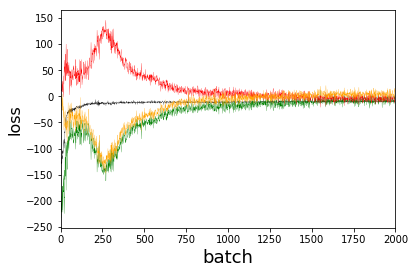

In [13]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot(gan.g_losses, color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, 2000)
# plt.ylim(0, 2)

plt.show()
